<a href="https://colab.research.google.com/github/Ishanavi/DataStory2/blob/main/DataStory2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
data_upload = files.upload()

Saving savings_data_final.csv to savings_data_final.csv


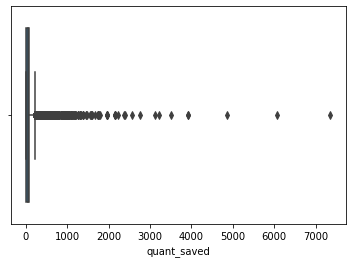

In [3]:
import seaborn as sns
import pandas as pd


df = pd.read_csv("savings_data_final.csv")

sns.boxplot(data = df,x=df["quant_saved"] )

In [4]:
q_1 = df["quant_saved"].quantile(0.25)
q_3 = df["quant_saved"].quantile(0.75)
iqr = q_3 - q_1
print(f"q_1 --> {q_1}")
print(f"q_3 --> {q_3}")
print(f"iqr --> {iqr}")

q_1 --> 2.284
q_3 --> 86.514
iqr --> 84.22999999999999


In [5]:
lower_whisker = q_1-1.5*iqr
upper_whisker = q_3+1.5*iqr
print(f"Upper Whisker --> {upper_whisker}")
print(f"Lower Whisker --> {lower_whisker}")

Upper Whisker --> 212.85899999999998
Lower Whisker --> -124.06099999999998


In [6]:
import statistics

new_df = df[df["quant_saved"]<upper_whisker]
new_all_savings = new_df["quant_saved"].tolist()
print(f"Mean --> {statistics.mean(new_all_savings)}")
print(f"Median --> {statistics.median(new_all_savings)}")
print(f"Mode --> {statistics.mode(new_all_savings)}")
print(f"Standard Deviation --> {statistics.stdev(new_all_savings)}")

Mean --> 46.20051938981879
Median --> 36.0475
Mode --> 0.0
Standard Deviation --> 50.86687191728863


In [7]:
import plotly.figure_factory as ff

fig = ff.create_distplot(
                          [new_all_savings],
                          ["Savings"],
                          show_hist = False
)
fig.show()

In [8]:
import random

def randomSetOfMean(counter):
  dataset = []
  for i in range(0,counter):
    dataset.append(random.choice(new_all_savings))
  mean = statistics.mean(dataset)
  return mean

def showFig(mean_list):
  fig = ff.create_distplot(
                              [mean_list],
                              ["Savings"],
                              show_hist = False
  )
  fig.show()

mean_list = []
for i in range(0,1000):
    set_of_mean = randomSetOfMean(100)
    mean_list.append(set_of_mean)
showFig(mean_list)
mean = statistics.mean(mean_list)
print("Sampling Mean --> ",mean)
print(f"Standard Deviation --> {statistics.stdev(mean_list)}")


Sampling Mean -->  45.97029960690776
Standard Deviation --> 4.993351450362076


In [9]:
print(f"Population Mean --> {statistics.mean(new_all_savings)}")
print(f"Sampling Mean --> {statistics.mean(mean_list)}")

Population Mean --> 46.20051938981879
Sampling Mean --> 45.97029960690776


In [10]:
import numpy as np

temp_df = new_df[new_df.age!=0]
age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

corr = np.corrcoef(age,savings)
print(f"Correlation between age and savings --> {corr[0,1]}")

Correlation between age and savings --> 0.08561544120342092


In [11]:
reminded_df = new_df.loc[new_df["rem_any"]==1]
not_reminded_df = new_df.loc[new_df["rem_any"]==0]
print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [12]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()],["Not reminded"],show_hist = False)
fig.show()

In [15]:
import plotly.graph_objects as go

not_reminded_savings = not_reminded_df["quant_saved"].tolist()
sampling_mean_list_not_reminded = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)
print(f"Mean of sampling not reminded --> {mean_sampling_not_reminded}")
print(f"Standard Deviation of sampling not reminded --> {stdev_sampling_not_reminded}")

fig = ff.create_distplot([sampling_mean_list_not_reminded],["sampling mean list not reminded"], show_hist = False)
fig.add_trace(go.Scatter(x=[mean_list,mean_list],y=[0,0.1], mode="lines", name="mean"))
fig.show()

Mean of sampling not reminded --> 43.91532096079033
Standard Deviation of sampling not reminded --> 4.961680269872439


In [17]:
first_stdev_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_stdev_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"first_stdev_start  --> {first_stdev_start} and first stdev end --> {first_stdev_end}")

second_stdev_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_stdev_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"second_stdev_start  --> {second_stdev_start} and second stdev end --> {second_stdev_end}")

third_stdev_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_stdev_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"third_stdev_start  --> {third_stdev_start} and third stdev end --> {third_stdev_end}")

first_stdev_start  --> 38.953640690917894 and first stdev end --> 48.87700123066277
second_stdev_start  --> 33.991960421045455 and second stdev end --> 53.83868150053521
third_stdev_start  --> 29.030280151173013 and third stdev end --> 58.80036177040765


In [18]:
reminded_savings = reminded_df["quant_saved"].tolist()
sampling_mean_list_reminded = []

for i in range(0,1000):
  temp_list = []
  for j in range(0,100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)
print(f"Mean of sampling reminded --> {mean_sampling_reminded}")
print(f"Standard Deviation of sampling reminded --> {stdev_sampling_reminded}")

fig = ff.create_distplot([sampling_mean_list_reminded],["sampling mean list reminded"], show_hist = False)
fig.add_trace(go.Scatter(x=[mean_list,mean_list],y=[0,0.1], mode="lines", name="mean"))
fig.show()

Mean of sampling reminded --> 47.91227286452659
Standard Deviation of sampling reminded --> 5.034754592468165


In [20]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded)/stdev_sampling_not_reminded
print(f"Z score --> {z_score}")

Z score --> 0.8055641811516844
